In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Inorder to use plotly in python, look up https://plot.ly/python/v3/getting-started/
import plotly
from plotly.offline import plot 
import chart_studio.plotly as py  
import chart_studio.tools as tls   
from plotly import graph_objs as go # https://stackoverflow.com/a/57112843/7583919

In [4]:
import seaborn as sns

In [5]:
# import warnings
# warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

In [7]:
import math
import random

In [8]:
import scipy
from scipy import stats, integrate
from scipy.integrate import quad
from scipy.special import factorial
from scipy.stats import poisson

In [9]:
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}

# Frequent distributions

## The Gauss Distribution

https://www.mathsisfun.com/data/standard-normal-distribution.html

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #467821">
$$f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$
</span>

The scipy.stats.norm usage https://blog.csdn.net/claroja/article/details/72830515

In [10]:
stats.norm.ppf(0.01)
stats.norm.ppf(0.99)

-2.3263478740408408

2.3263478740408408

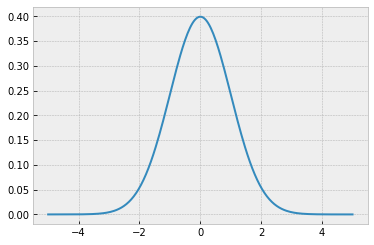

In [11]:
#x = np.linspace(start=stats.norm.ppf(0.01), stop=stats.norm.ppf(0.99), num=250)
x = np.linspace(-5, 5, num = 250)

y = stats.norm.pdf(x)
_ = plt.plot(x, y)
plt.show()

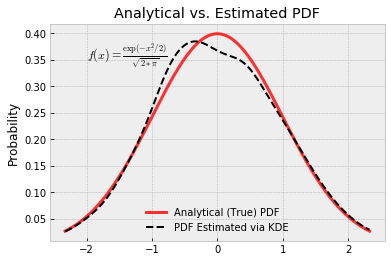

In [13]:
x = np.linspace(start=stats.norm.ppf(0.01), stop=stats.norm.ppf(0.99), num=250)
gkde = stats.gaussian_kde(dataset=stats.norm.rvs(size=1000))

fig, ax = plt.subplots()
_ = ax.plot(x,
            stats.norm.pdf(x),
            linestyle='solid',
            c='red',
            lw=3,
            alpha=0.8,
            label='Analytical (True) PDF')
_ = ax.plot(x,
            gkde.evaluate(x),
            linestyle='dashed',
            c='black',
            lw=2,
            label='PDF Estimated via KDE')
_ = ax.legend(loc='best', frameon=False)
_ = ax.set_title('Analytical vs. Estimated PDF')
_ = ax.set_ylabel('Probability')
_ = ax.text(-2.,
            0.35,
            r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
            fontsize=12)

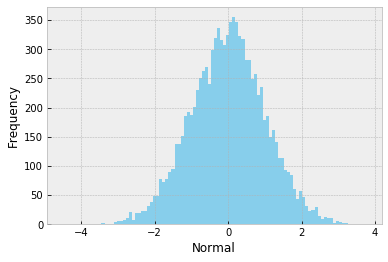

In [14]:
data_normal = stats.norm.rvs(size=10000, loc=0, scale=1)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={
                      "linewidth": 15,
                      'alpha': 1
                  })
_ = ax.set(xlabel='Normal', ylabel='Frequency')

### Plot the pdf  for Gauss distribution

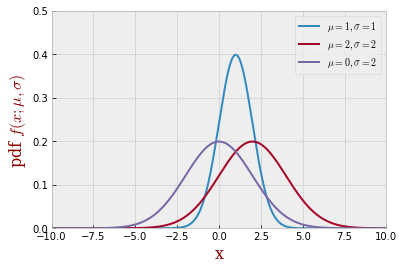

In [15]:
x = np.linspace (-200, 100, 11000) 

y1 = stats.norm.pdf(x, loc=1, scale=1) 
y2 = stats.norm.pdf(x, loc=2, scale=2)
y3 = stats.norm.pdf(x, loc=0, scale=2)

_ = plt.plot(x, y1, label=(r'$\mu=1, \sigma= 1$')) 
_ = plt.plot(x, y2, label=(r'$\mu=2, \sigma= 2$')) 
_ = plt.plot(x, y3, label=(r'$\mu=0, \sigma= 2$'))

_ = plt.xlabel("x",fontdict = font)
_ = plt.ylabel("pdf $f(x;\mu,\sigma)$ ",fontdict = font)
_ = plt.legend()

_ = plt.ylim([0,0.5])
_ = plt.xlim([-10,10])
_ = plt.show()

In [16]:
x = np.linspace (0, 100, 1100) 
y1 = stats.norm.pdf(x, loc=1, scale=1) # loc代表了均值,scale代表标准差
y2 = stats.norm.pdf(x, loc=2, scale=2)
y3 = stats.norm.pdf(x, loc=0, scale=2)


trace1 = go.Scatter(x = x, y = y1)
trace2 = go.Scatter(x = x, y = y2)
trace3 = go.Scatter(x = x, y = y3) 
data=[trace1, trace2, trace3]
layout = go.Layout(height = 550, width = 550, xaxis=dict(range=[0, 12], title = 'x'), 
                   yaxis=dict(range=[0, 0.5], title = 'pdf $f(x;\mu,\sigma)$'))
figure=go.Figure(data=data,layout=layout)
py.iplot(figure, filename='pyguide_1')

### Simulate Gauss distribution

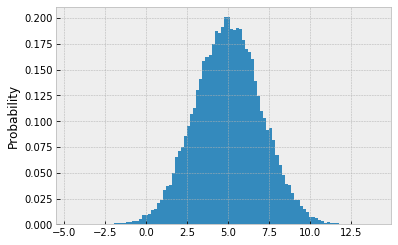

In [17]:
mean1 = 5 
sd1 = 2
c = np.random.normal(mean1, sd1, 30000) 
w1, x1, z1 = plt.hist(c, bins=100, density=True) 
plt.ylabel('Probability');

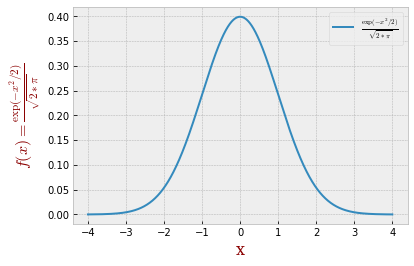

In [18]:
f = lambda x: 1 / math.sqrt(2 * math.pi) * math.exp(-math.pow(x, 2) / 2)


def evenlyDistributedPoints(lower_limit, upper_limit, num):
    z = []
    interval = (upper_limit - lower_limit) / num
    for i in range(0, num + 1):
        a = lower_limit + interval * i
        z.append(a)
    return z


# the function is same as the np.linespace
x = evenlyDistributedPoints(-4, 4, int(1e5))
y = [f(i) for i in x]
_ = plt.plot(x, y, label=r'$ \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$')
_ = plt.xlabel('x', fontdict=font)
_ = plt.ylabel(r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$', fontdict=font)
_ = plt.legend()

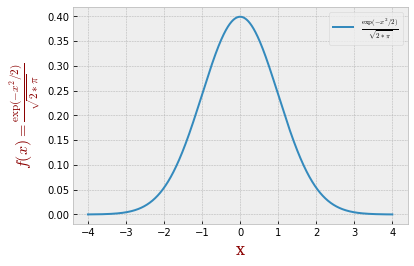

In [19]:
f = lambda x: 1 / np.sqrt(2 * math.pi) * np.exp(-np.power(x, 2) / 2)

x = np.linspace(-4, 4, 1e5)
y = f(x)
_ = plt.plot(x, y, label=r'$ \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$')
_ = plt.xlabel('x', fontdict=font)
_ = plt.ylabel(r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$', fontdict=font)
_ = plt.legend()

### Demo of the histogram (hist) function with a few features

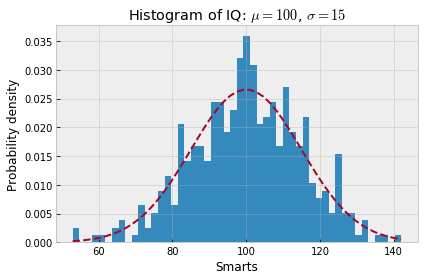

In [20]:
np.random.seed(19680801)
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
_ = ax.plot(bins, y, '--')
_ = ax.set_xlabel('Smarts')
_ = ax.set_ylabel('Probability density')
_ = ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Normal Distribution (mean,std): 8.0 3.0
Integration bewteen 11.0 and 14.0 -->  0.13590512198327787


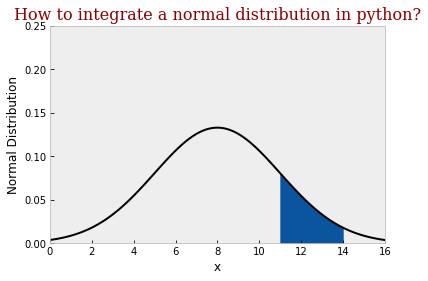

In [21]:
from scipy.integrate import quad
import scipy.stats

#----------------------------------------------------------------------------------------#
# Normal Distribution

x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 3.0

x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std)
_ = plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# integration between x1 and x1

def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,mean,std)
    return value

x1 = mean + std
x2 = mean + 2.0 * std
res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',mean,std)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

#----------------------------------------------------------------------------------------#
# plot integration surface

ptx = np.linspace(x1, x2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)
_ = plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

#----------------------------------------------------------------------------------------#

_ = plt.grid()

_ = plt.xlim(x_min,x_max)
_ = plt.ylim(0,0.25)
_ = plt.title('How to integrate a normal distribution in python?',fontdict = font)
_ = plt.xlabel('x')
_ = plt.ylabel('Normal Distribution')
_ = plt.savefig("integrate_normal_distribution.png")
_ = plt.show()

## The possion Distribution

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #348ABD'">
$$f(n;\nu)=\frac{\nu^n}{n!}e^{-\nu}$$

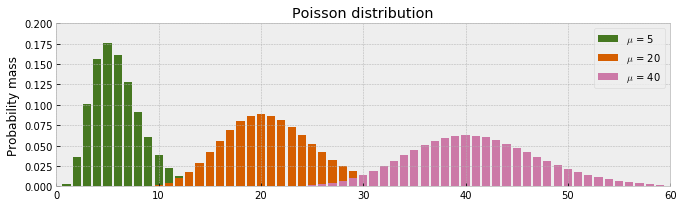

In [22]:
fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(111)
x_lim = 60
mu = [5, 20, 40]
for i in np.arange(x_lim): 
    _ = plt.bar(i, stats.poisson.pmf(mu[0], i), color=colors[3])
    _ = plt.bar(i, stats.poisson.pmf(mu[1], i), color=colors[4])
    _ = plt.bar(i, stats.poisson.pmf(mu[2], i), color=colors[5])
    
_ = ax.set_xlim(0, x_lim)
_ = ax.set_ylim(0, 0.2)
_ = ax.set_ylabel('Probability mass')
_ = ax.set_title('Poisson distribution')
_ = plt.legend(['$\mu$ = %s' % mu[0], '$\mu$ = %s' % mu[1], '$\mu$ = %s' % mu[2]])

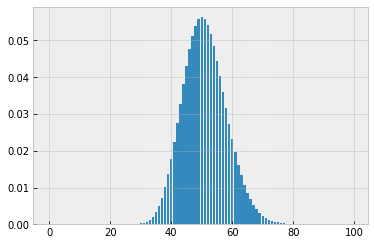

In [25]:
for i in np.arange(100): 
    _ = plt.bar(i, stats.poisson.pmf(50, i), color=colors[0])
_ = ax.set_xlim(30, 100)
_ = ax.set_ylabel('Probability mass')

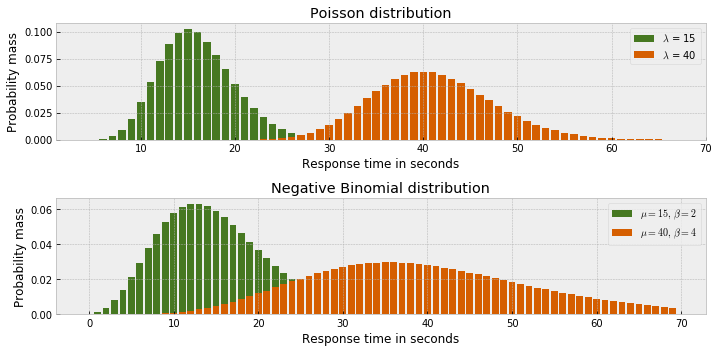

In [26]:
fig = plt.figure(figsize=(10,5))
_ = fig.add_subplot(211)
x_lim = 70
mu = [15, 40]
for i in np.arange(x_lim):
    _ = plt.bar(i, stats.poisson.pmf(mu[0], i), color=colors[3])
    _ = plt.bar(i, stats.poisson.pmf(mu[1], i), color=colors[4])
    
_ = plt.xlim(1, x_lim)
_ = plt.xlabel('Response time in seconds')
_ = plt.ylabel('Probability mass')
_ = plt.title('Poisson distribution')
_ = plt.legend(['$\lambda$ = %s' % mu[0],
                '$\lambda$ = %s' % mu[1]])

# Scipy takes parameters n & p, not mu & alpha
def get_n(mu, alpha):
    return 1. / alpha * mu

def get_p(mu, alpha):
    return get_n(mu, alpha) / (get_n(mu, alpha) + mu)

_ = fig.add_subplot(212)

a = [2, 4]

for i in np.arange(x_lim):
    _ = plt.bar(i, stats.nbinom.pmf(i, n=get_n(mu[0], a[0]), p=get_p(mu[0], a[0])), color=colors[3])
    _ = plt.bar(i, stats.nbinom.pmf(i, n=get_n(mu[1], a[1]), p=get_p(mu[1], a[1])), color=colors[4])

_ = plt.xlabel('Response time in seconds')
_ = plt.ylabel('Probability mass')
_ = plt.title('Negative Binomial distribution')
_ = plt.legend(['$\\mu = %s, \/ \\beta = %s$' % (mu[0], a[0]),
                '$\\mu = %s, \/ \\beta = %s$' % (mu[1], a[1])])

plt.tight_layout()

### Plot the pdf for Possion distribution

In [27]:
math.exp(2)
np.math.factorial(0)
np.exp(2)
np.exp2(2)

7.38905609893065

1

7.38905609893065

4.0

In [28]:
def PossionDistribution(m, n):
    formulaExpression = np.power(m, n) / np.math.factorial(n) * np.exp(-m)
    return formulaExpression

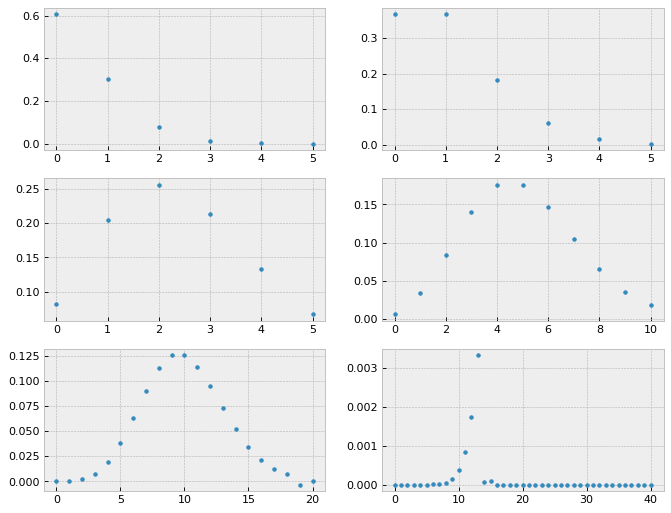

In [29]:
f = lambda m, n: np.power(m, n) / np.math.factorial(n) * np.exp(-m)
f = np.vectorize(f)

_ = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(6)
y = f(0.5, x)
_ = plt.subplot(321)
_ = plt.plot(x, y, '.')

y = f(1, x)
_ = plt.subplot(322)
_ = plt.plot(x, y, '.')

y = f(2.5, x)
_ = plt.subplot(323)
_ = plt.plot(x, y, '.')

x = np.arange(11)
y = f(5, x)
_ = plt.subplot(324)
_ = plt.plot(x, y, '.')

_ = plt.subplot(325)
x = np.arange(21)
y = f(10, x)
_ = plt.plot(x, y, '.')

_ = plt.subplot(326)
x = np.arange(41)
y = f(25, x)
_ = plt.plot(x, y, '.')
_ = plt.show()

### Simulate Possion distribution

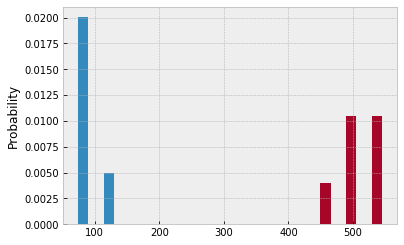

In [30]:
c = np.random.poisson(lam=(100, 500), size=(100, 2))
w1, x1, z1 = plt.hist(c, bins=12, density=True) 
_ = plt.ylabel('Probability');

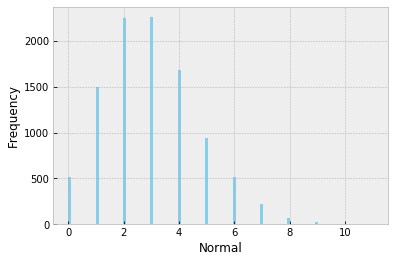

In [31]:
data_normal = stats.poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
_ = ax.set(xlabel='Normal', ylabel='Frequency')

## [The Binomal Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #009E73"> 
$$f(r;N,p)=\frac{N!}{r!(N-r)!}p^{r}(1-p)^{n-r}$$

### Plot the pdf for Binormal  distribution

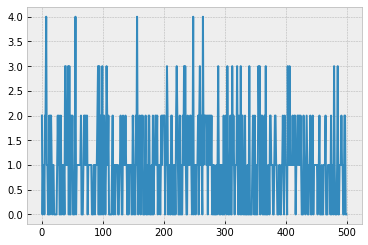

In [32]:
#  returns a list of samples from a binomial distribution based on the inputted parameters 
bn = np.random.binomial(10, 0.1, 500)
_ = plt.plot(bn)

## The Negative Binomial Distribution

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #009E73">
$$f(r; k, p)=\frac{(k+r-1)!}{r!(k-1)!}q^kp^r$$

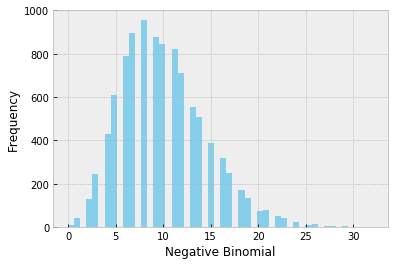

In [33]:
import warnings
warnings.filterwarnings('ignore')
data_nbinom = stats.nbinom.rvs(10, 0.5, size=10000)
ax = sns.distplot(data_nbinom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
_ = ax.set(xlabel='Negative Binomial', ylabel='Frequency')

## The Landau Distribution


<span style="font-family: Cosmic Sans MS; font-size:2em; color: #009E73">
$$f(\lambda)=\frac{1}{\pi}\int_{0}^{\infty}e^{-u\ln u -\lambda u} \sin(\pi u) du = \int_{0}^{\infty} g(\lambda, u) du$$
</span>

In [34]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf) 
integrate.quad(lambda x: scipy.special.jv(2.5,x), 0, 4.5)

(1.0000000000000002, 5.842606742906004e-11)

(1.1178179380783253, 7.866317182537226e-09)

In [35]:
f = lambda l,u: 1/np.pi *np.exp(-u*np.log(u)-l*u)*np.sin(np.pi*u)
def zzz(llist):
    x = []
    for l in llist:
        yy = integrate.quad(lambda u: f(l, u), 0, np.inf)[0] 
        x.append(yy)
    return x 

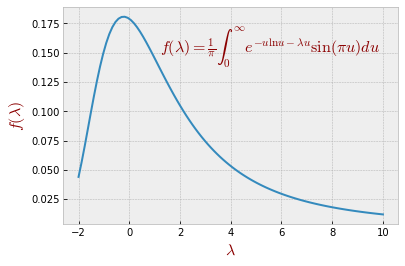

In [36]:
x = np.linspace(-2, 10, 100)
y = zzz(x)
_ = plt.plot(x, y)
_ = plt.text(1.2, 0.15, r'$f(\lambda)=\frac{1}{\pi}\int_{0}^{\infty}e^{-u\ln u -\lambda u} \sin(\pi u) du$', fontdict= font)
_ = plt.xlabel('$\lambda$', fontdict= font)
_ = plt.ylabel('$f(\lambda)$', fontdict= font)

## Gamma Distribution

### Characterization using shape α and rate β

A random variable X that is gamma-distributed with shape α and rate β is denoted 
$X \sim \Gamma ( \alpha , \beta ) \equiv \operatorname { Gamma } ( \alpha , \beta )$

The corresponding probability density function in the shape-rate parametrization is  

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #009E73">
$$
f ( x ; \alpha , \beta ) = \frac { \beta ^ { \alpha } x ^ { \alpha - 1 } e ^ { - \beta x } } { \Gamma ( \alpha ) } \quad \text { for } x > 0 \text { and } \alpha , \beta > 0
$$

### Characterization using shape k and scale θ

A random variable X that is gamma-distributed with shape α and rate β is denoted 
$X \sim \Gamma ( k , \theta ) \equiv \operatorname { Gamma } ( k , \theta )$

The corresponding probability density function in the shape-rate parametrization is   
<span style="font-family: Cosmic Sans MS; font-size:2em; color: #009E73">
$$
f ( x ; k , \theta ) = \frac { x ^ { k - 1 } e ^ { - \frac { x } { \theta } } } { \theta ^ { k } \Gamma ( k ) } \quad \text { for } x > 0 \text { and } k , \theta > 0
$$


<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg" style="width: 50%; height: 50%"/>

#### Self defined pdf 

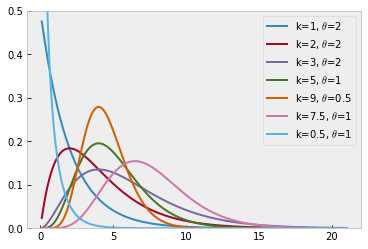

In [37]:
f = lambda x, k, m: np.power(x, k-1)*np.exp(-x/m)/(np.power(m, k)*np.math.gamma(k)) 
x = np.linspace(0.1, 21, 200)
klist = [1, 2, 3, 5, 9, 7.5, 0.5]
mlist = [2, 2, 2, 1, 0.5, 1, 1]

for i in range(7): 
    y = [f(j, klist[i], mlist[i]) for j in x] 
    _ = plt.plot(x, y, label=(r'k='+ str(klist[i]))+ r', $\theta$='+str(mlist[i]))
    _ = plt.ylim(0, 0.5) 
_ = plt.legend() 
_ = plt.grid() 

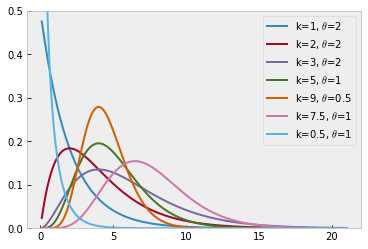

In [38]:
f = lambda x, k, m: np.power(x, k-1)*np.exp(-x/m)/(np.power(m, k)*np.math.gamma(k)) 
x = np.linspace(0.1, 21, 200)
klist = [1, 2, 3, 5, 9, 7.5, 0.5]
mlist = [2, 2, 2, 1, 0.5, 1, 1]

# Using np.vectorize the scalar f function can be converted into a
# vectorized function that works with NumPy arrays as input:
f = np.vectorize(f)
for i in range(7): 
    y = f(x, klist[i], mlist[i]) 
    _ = plt.plot(x, y, label=(r'k='+ str(klist[i]))+ r', $\theta$='+str(mlist[i]))
    _ = plt.ylim(0, 0.5) 
_ = plt.legend() 
_ = plt.grid() 

In [39]:
x = np.linspace(0.1, 21, 200)
klist = [2, 3, 5, 7, 9, 7.5, 0.5]
mlist = [2, 2, 2, 1, 0.5, 1, 1]

f = np.vectorize(f)
for i in range(7): 
    y = f(x, klist[i], mlist[i]) 
    _ = plt.plot(x, y, label=(r'k='+ str(klist[i]))+ r', $\theta$='+str(mlist[i]))
    _ = plt.ylim(0, 0.5) 
mpl_fig1 = plt.gcf()
py.iplot_mpl(mpl_fig1, filename='Gamma Distribution')

#### Built in pdf

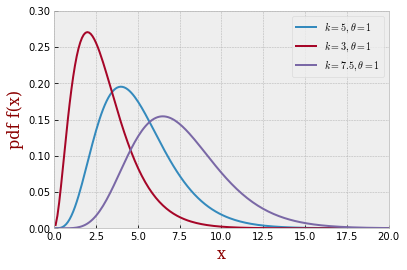

In [40]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace (0.1, 21, 200) 
y1 = stats.gamma.pdf(x, a=5, scale=1) # a = k, scale = 1/ theta
y2 = stats.gamma.pdf(x, a=3, scale=1)
y3 = stats.gamma.pdf(x, a=7.5, scale=1)

_ = plt.plot(x, y1, label=(r'$k=5, \theta=1$')) 
_ = plt.plot(x, y2, label=(r'$k=3, \theta=1$')) 
_ = plt.plot(x, y3, label=(r'$k=7.5, \theta=1$'))

_ = plt.xlabel("x",fontdict = font)
_ = plt.ylabel("pdf f(x)",fontdict = font)
_ = plt.legend()

_ = plt.ylim([0,0.3])
_ = plt.xlim([0,20])

# Reference
* http://cmdlinetips.com/2018/03/probability-distributions-in-python/